In [3]:
__author__ = 'racah'
import numpy as np
import os
import pickle
import sys
import h5py
import matplotlib
from sklearn.manifold import TSNE
import numpy as np
#matplotlib.use('agg')
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from util.data_loaders import load_ibd_pairs, get_ibd_data
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
from networks.evdcae_net import DenoisingConvAe
from networks.LasagneConv import IBDPairConvAe
from networks.print_n_plot import walk_manifold
from helper.helper_fxns import create_run_dir
import logging
%matplotlib inline

# 1) Primary AD           10000 or 1
# 2) Delayed AD response  01000 or 2
# 3) Muon decay           00100 or 3
# 4) Flasher              00010 or 4
# 5) Other (background noise) 00001 or 5




Building model and compiling functions...
(None, 2, 8, 24)
(None, 128, 11, 12)
(None, 128, 6, 6)
(None, 1024)
(None, 4608)
(None, 128, 6, 6)
(None, 128, 11, 12)
(None, 2, 8, 24)
Starting training...
Epoch 1 of 1 took 8.808s
	training los:		0.1767
	training acc:		16.0058 %
  validation loss:		0.186352
  validation accuracy:		18.64 %


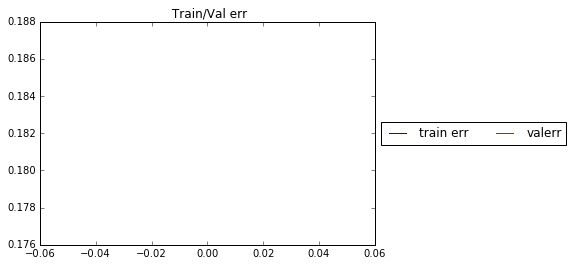

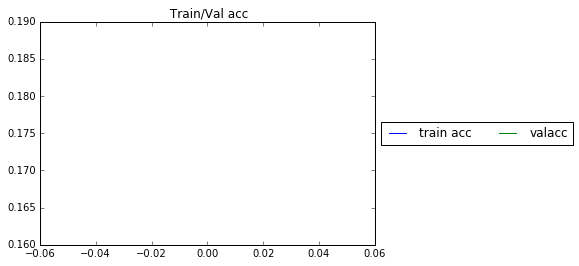

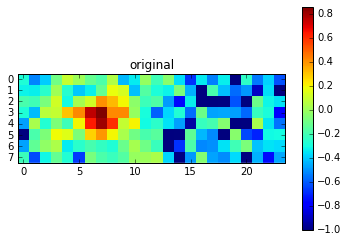

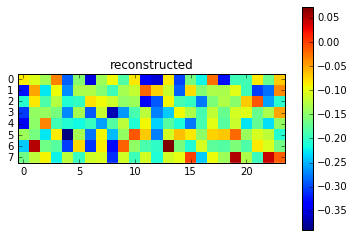

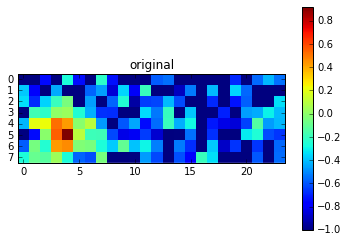

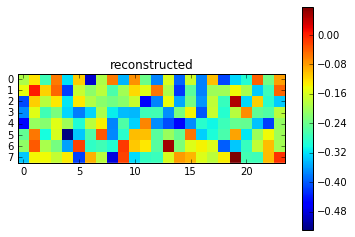

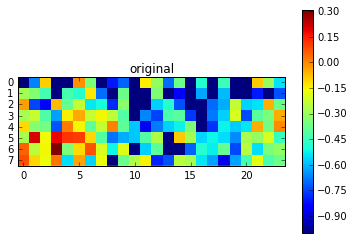

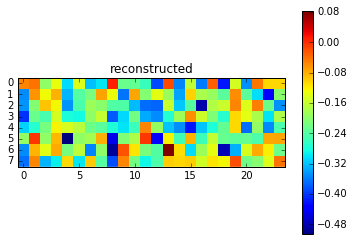

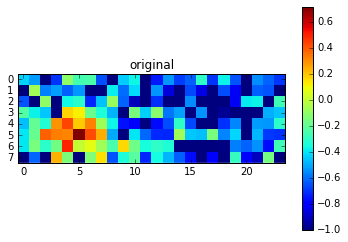

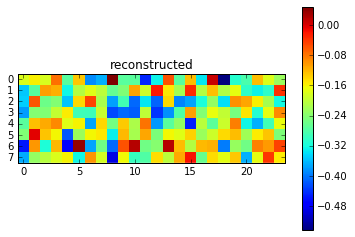

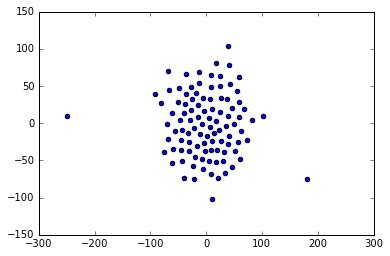

In [2]:
if __name__ == "__main__":
    run_dir = create_run_dir()
    
    
    
    x_train, x_val, x_test = get_ibd_data(tot_num_pairs=200, preprocess=True, just_charges=True)

    dca = DenoisingConvAe(network_kwargs={'learning_rate':0.01}, 
                          train_kwargs={'num_epochs': 1, 'save_path': run_dir})

    dca.fit(x_train,x_train,x_val,x_val)

    rec= dca.predict(x_train)

    hlayer = dca.extract_hidden_layer(x_train)



    ts = TSNE(perplexity=50).fit_transform(hlayer)
    
    %matplotlib nbagg
    walk_manifold(x_train,ts)
    plt.scatter(ts[:,0], ts[:,1])
    plt.savefig(run_dir + '/tsne.png')

<IPython.core.display.Javascript object>


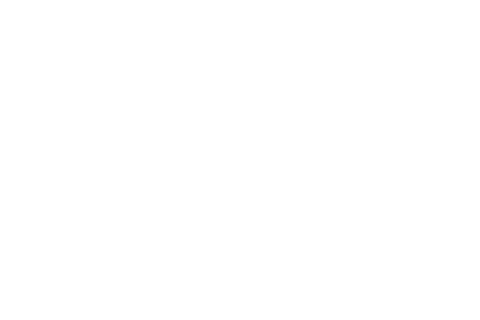

<IPython.core.display.Javascript object>


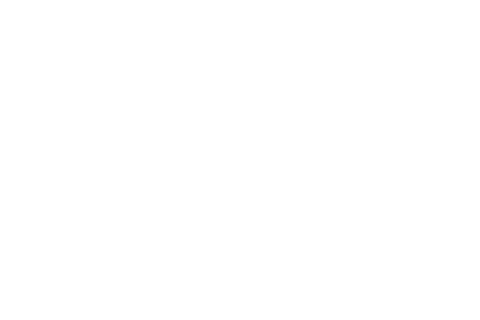

<IPython.core.display.Javascript object>


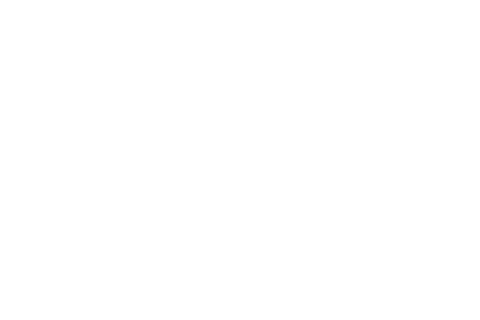

<IPython.core.display.Javascript object>


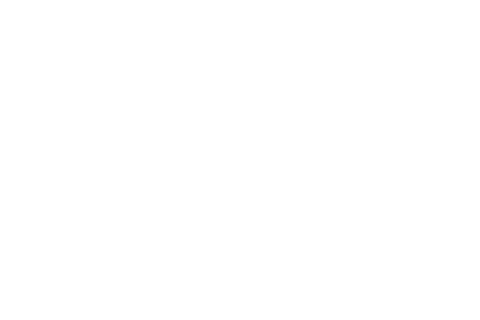

In [7]:
pl.show()